# Algerian Forest Fire Data

##  Problem statement.
  
   - The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

   - If User can Predict that Algerian Forest will Catch Fire or Not based on Input Features.

   - Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.

## Data Collection
  

- The Dataset is collected from UCI Mechine Learing Reposatory.

- The dataset having 14 columns and 244 rows.

## Information Of Dataset

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

----

----

#### Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plotly
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#### Loading CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1 )

In [3]:
# Showing top 5 record 

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Data Cleaning

In [4]:
# Removing Unnecessary row from dataset

df.drop(index=[122,123], inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

In [5]:
# Adding New Features, Named 'Region' in a dataset

df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi_Bel_Abbes'

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi_Bel_Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi_Bel_Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi_Bel_Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi_Bel_Abbes


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [8]:
#Stripping the names of the Column:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
# Striping the Classes features data


df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [11]:
# Changing the DataTypes of the Columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [13]:
df['Date'] = pd.to_datetime(df[['day','month','year']])

In [14]:
df.drop(['day','month','year'], axis = 1, inplace = True)

In [15]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi_Bel_Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi_Bel_Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi_Bel_Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi_Bel_Abbes,2012-09-29


# Exploring Data

---------

In [16]:
# Shape of the Dataset

df.shape

(244, 13)

In [17]:
# Columns of the Dataset:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

#### Observation:
- there are 13 columns and 244 rows available in the dataset.


In [18]:
# Checking missing values:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
Date           0
dtype: int64

#### Observation:
- There is one null value in "Classes" Features

#### Handling Categorical Features Classes:

In [19]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [20]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

In [21]:
# Replacing Null Value
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [22]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

#### Reviewing Dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


#### Observations

- There is total 244 rows and 13 columns.
- There are No Null Value in Dataset
- There is total 4 data types float64, int64, object and datetime64.
- Dtypes Included float64 = 7 Columns, int64 = 2 Columns, object - 3 Columns and datetime64 = 1
- Total Memory Usage is 23.0+ KB

------

### Numerical And Categorical Columns

In [24]:
# Getting Numerical features from dataset

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'Date']


In [25]:
# Getting Categorical features from dataset:

categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 categorical features : ['DC', 'FWI', 'Region']


### Features information

In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,Bejaia,2012-06-05


#### Weather data observations:-

- Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8

#### FWI Components
- (FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5
- (DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9
- (DC) Drought Code index from the FWI system: 7 to 220.4
- (ISI) Initial Spread Index from the FWI system: 0 to 18.5
- (BUI) Buildup Index from the FWI system: 1.1 to 68
- (FWI) Fire Weather Index: 0 to 31.1

- Classes: two classes, namely Fire and not Fire.

- Region: Two Regions, namely Bejaia Region indicated with 0 and Sidi Bel-Abbes Region indicated with 1.

### Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [27]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

### Numerical Features Analysis

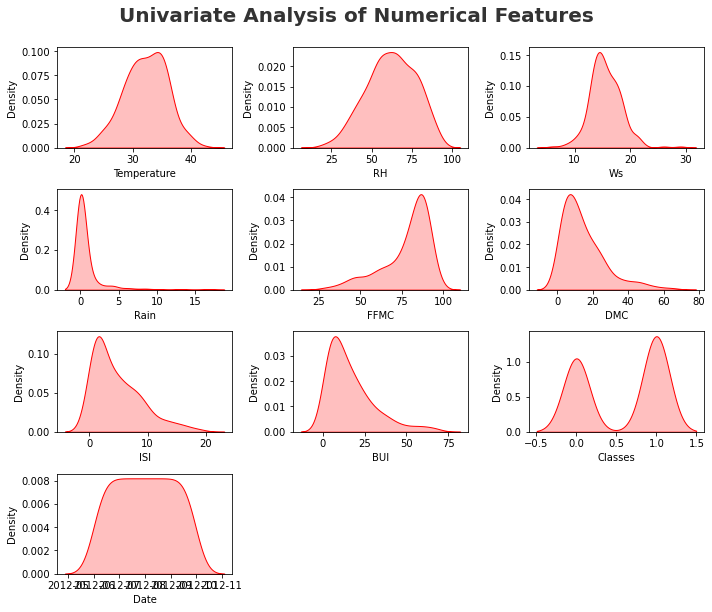

In [28]:
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#### Observations
- Rain,ISI,BUI,DMC are right skewed and postively skewed.
- FFMC is a Left skewed and Negetively skewed.
- Outliers in Rain, ISI, BUI, DMC and FFMC

----

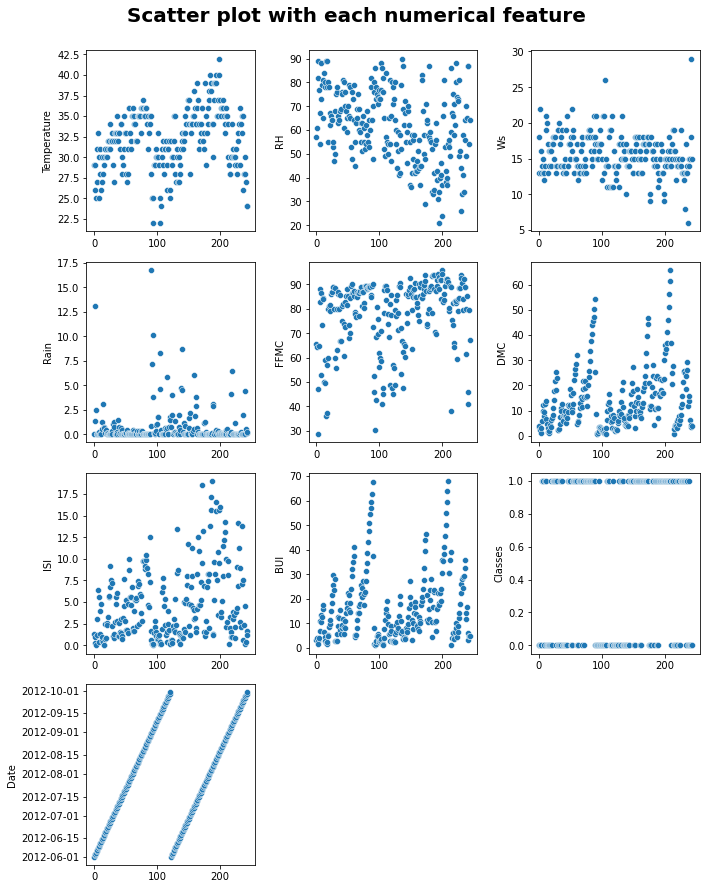

In [29]:
# Scatter plot 

plt.figure(figsize=(10, 15))
plt.suptitle('Scatter plot with each numerical feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

-----

### Categorical Feature Analysis :

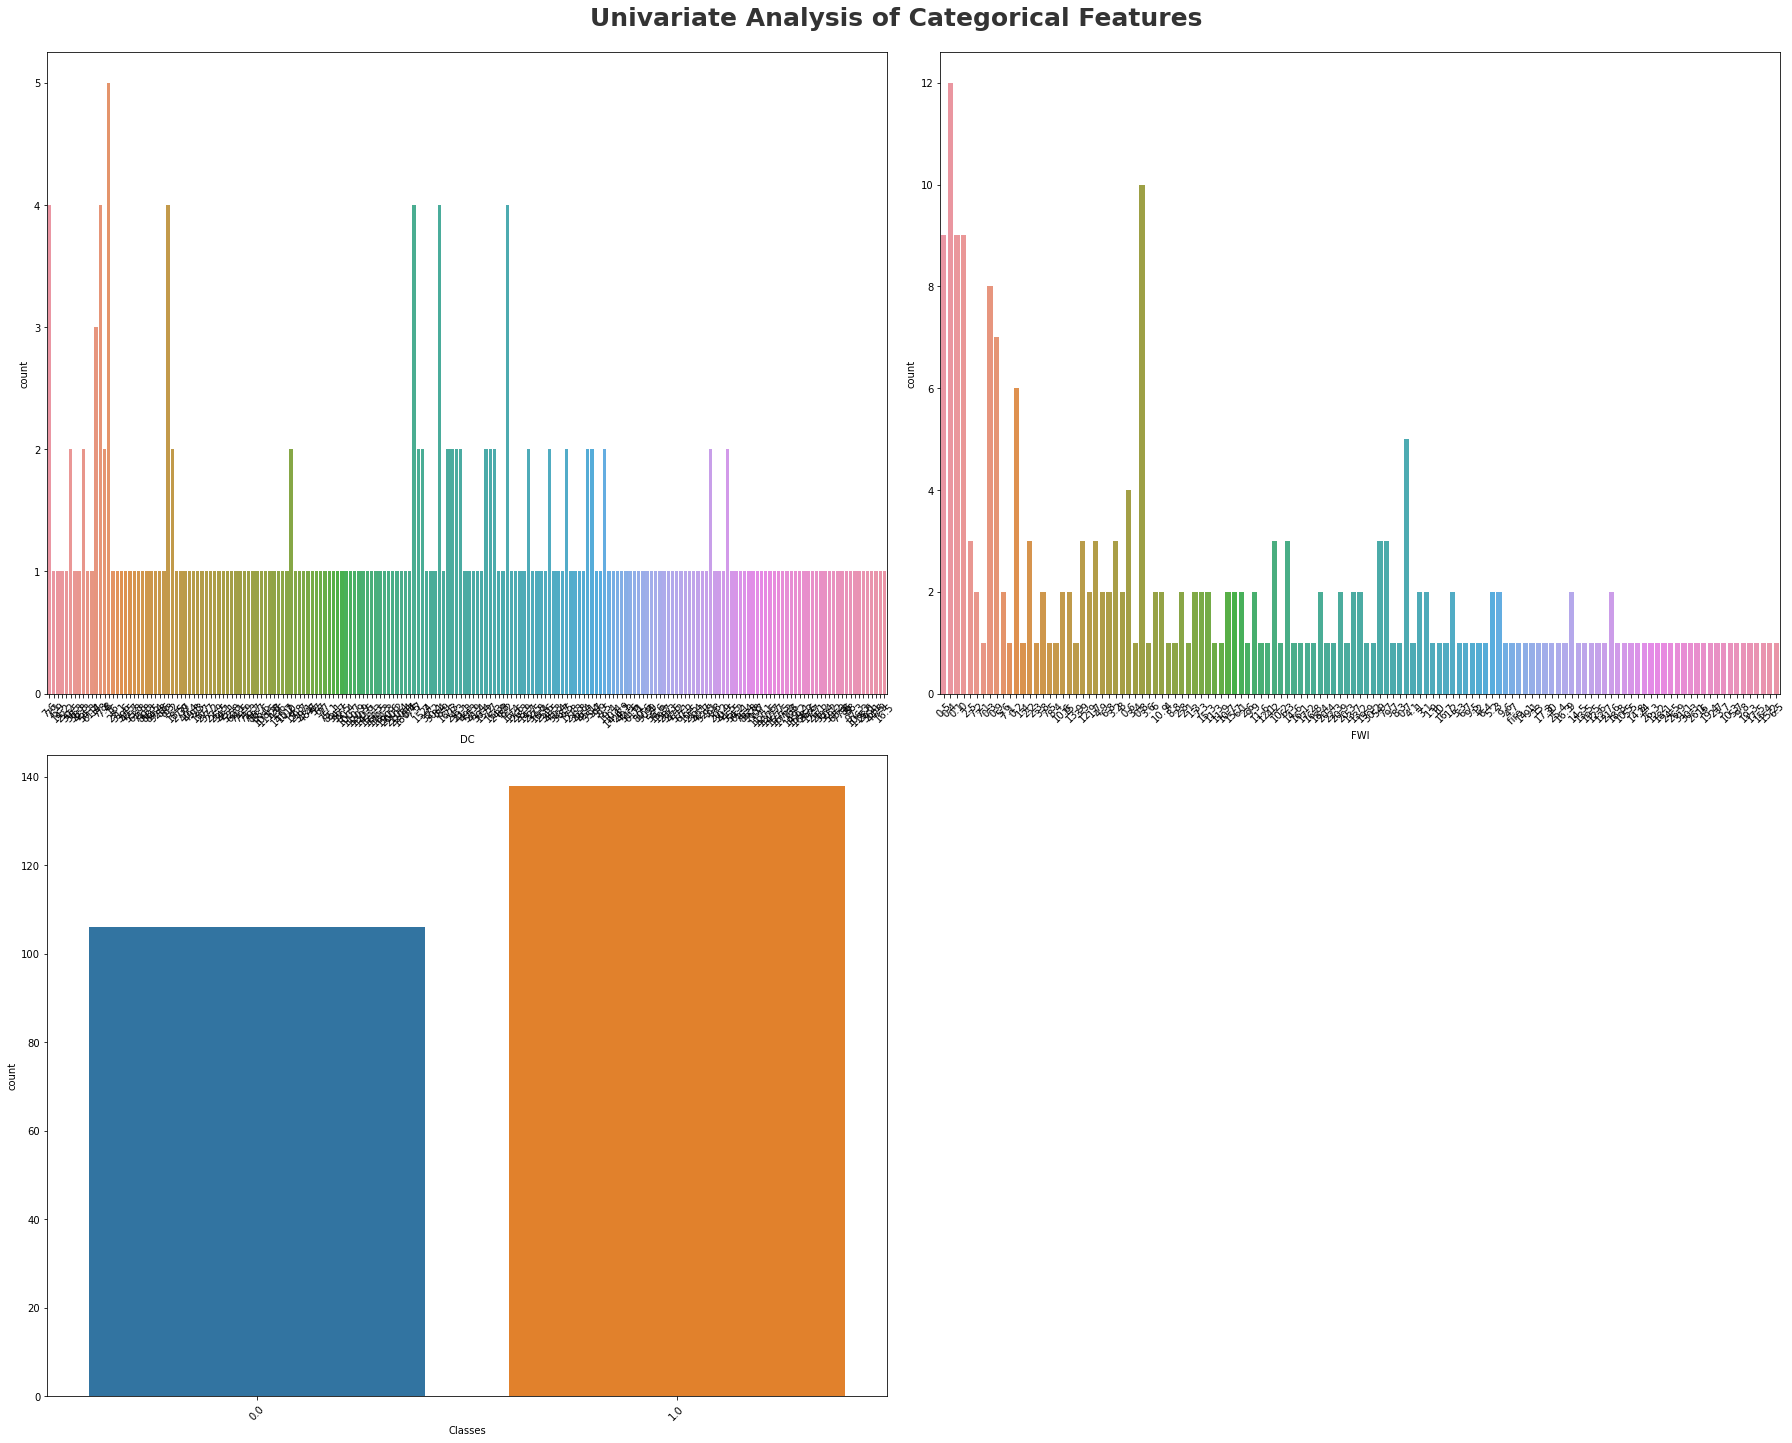

In [30]:
plt.figure(figsize=(25, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=25, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

-----

### Multicolleniarity in numerical features

In [31]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


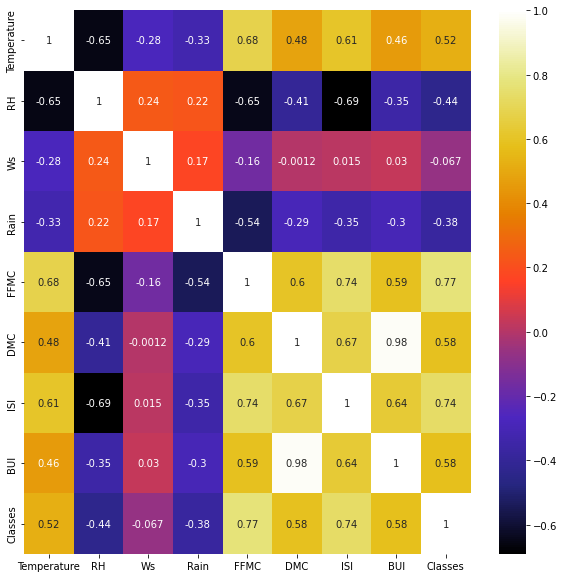

In [32]:
## Plotting Heatmap

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Observation:
* Highly -ve correlated features are RH and Temperature, RH and FFMC, RH and ISI 
* Highly +ve correlated features are DMC and BUI

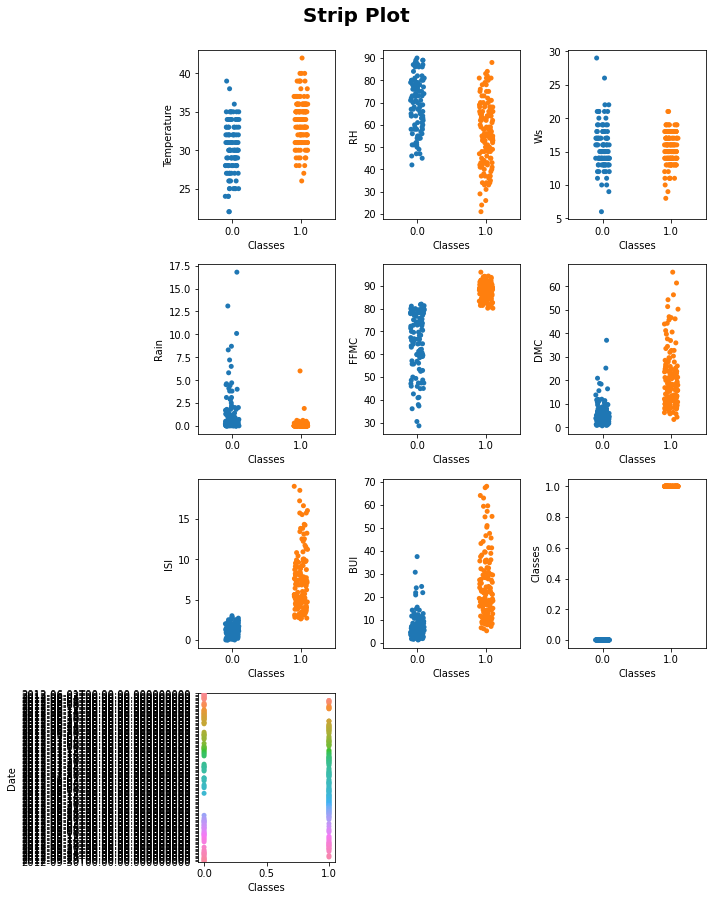

In [33]:
# Stir plot between numerical feature and target

plt.figure(figsize=(10, 15))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=df)
    plt.tight_layout()

#### Observation: 
- places with higher temperature has fire

- places with lower RH has fire
- places wiht ffmc > 80 has fire
- places wiht ISI > 2.5 has fire
- places with Rain < 2 has fire

-------

<AxesSubplot:>

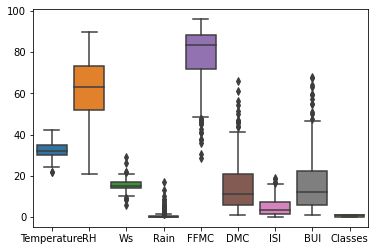

In [34]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")

-----

In [35]:
# Display summary statistics for a dataframe
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


-----

### Graphical Analysis


----

<AxesSubplot:xlabel='Region', ylabel='Classes'>

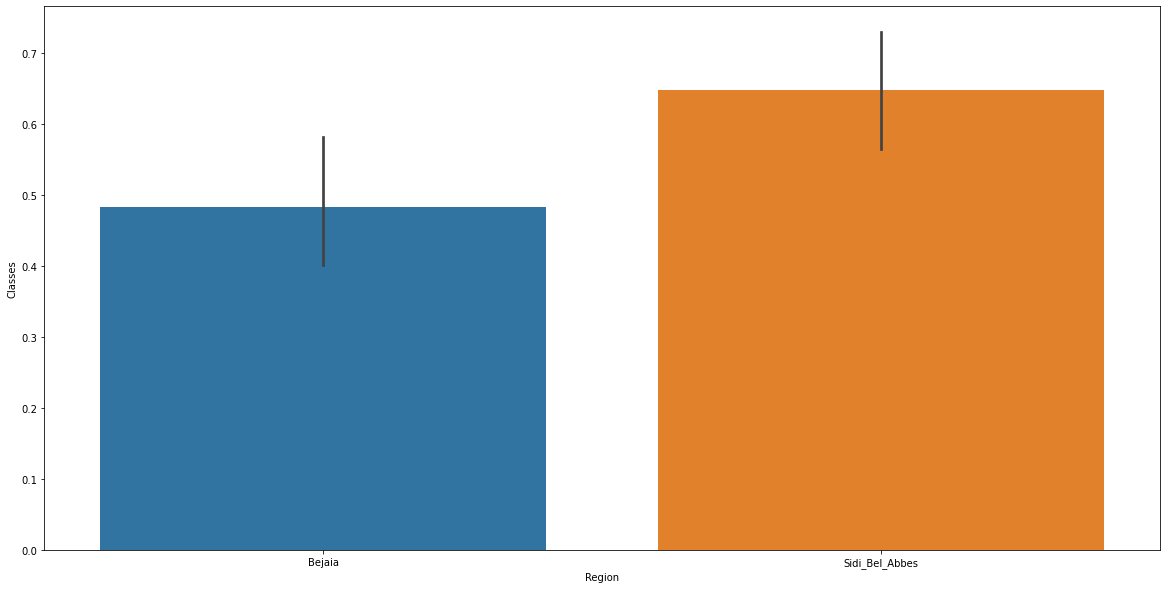

In [36]:
plt.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Classes",data=df)

#### Observation 
- Sidi-Bel-Abbes Region has Most of the Time Fire Took Placed.

-----

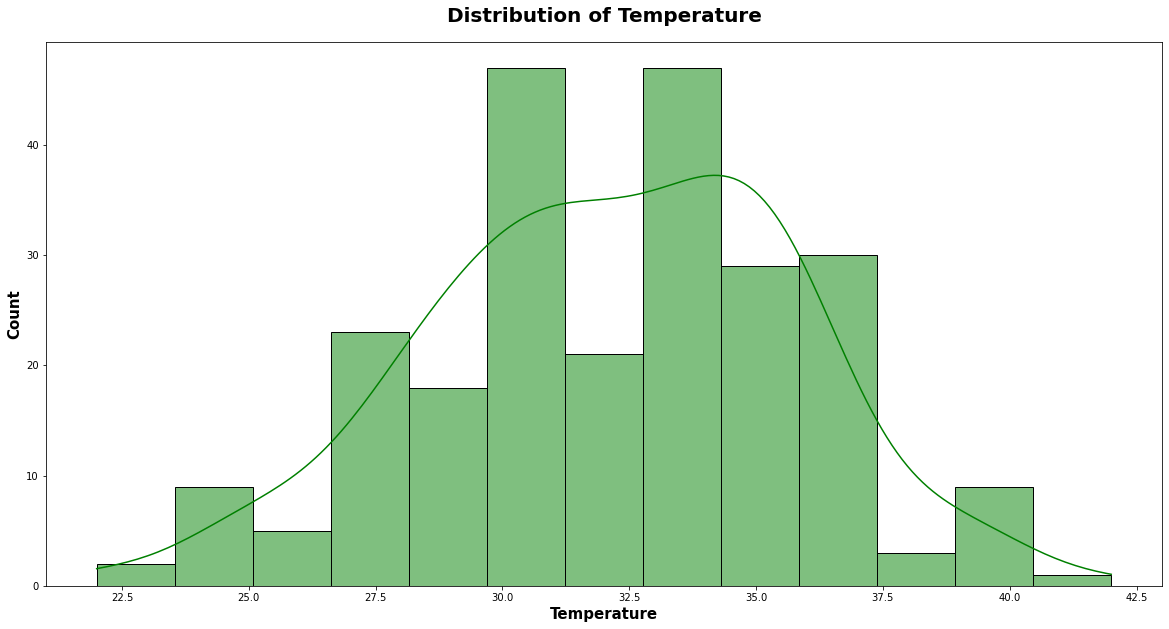

In [37]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

#### Observation
- Temperature occur most of the time in range 32.5 to 35.0

-----

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

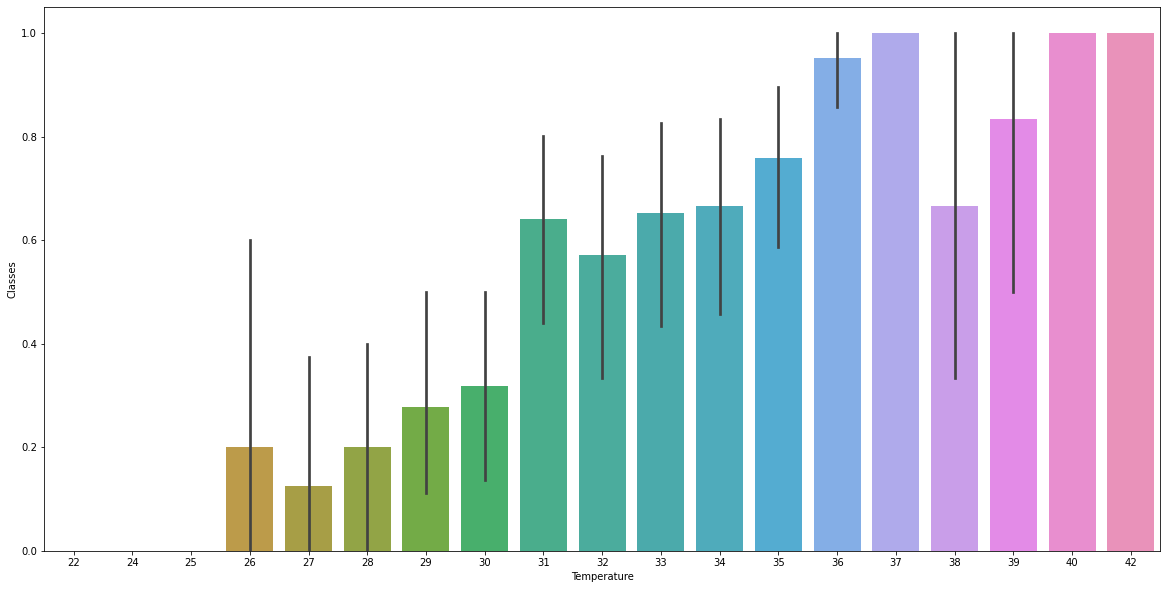

In [38]:
plt.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=df)

#### Observation:-

Highest temperature is 42,40,37

----

<AxesSubplot:xlabel='Region', ylabel='Rain'>

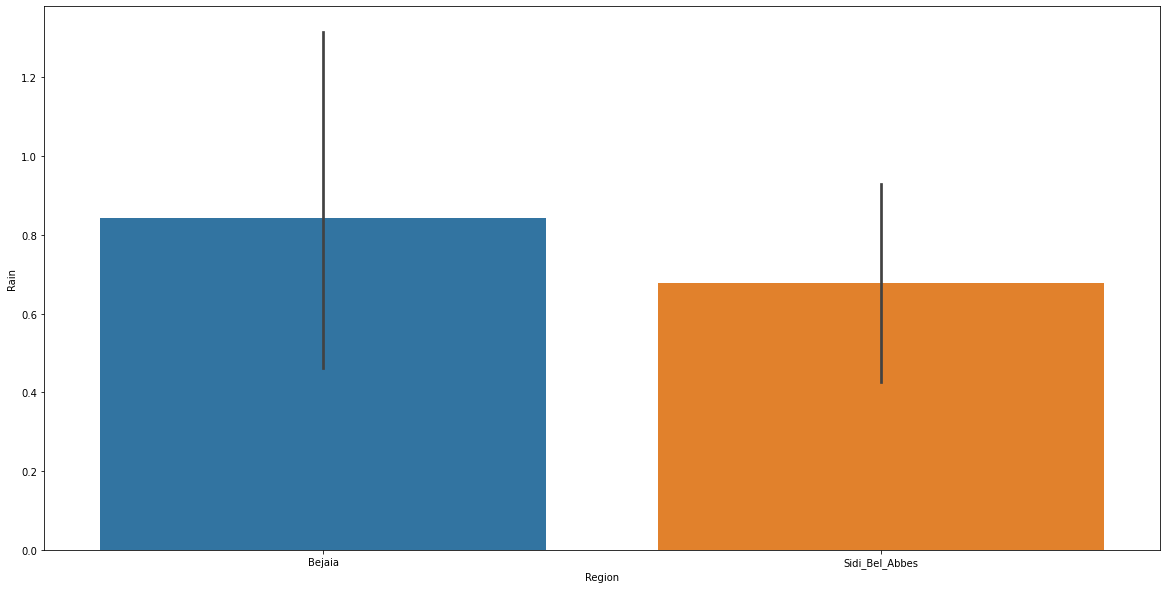

In [39]:
plt.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Rain",data=df)

#### Observation

- Bejaia is the region in which most of the time rain happens

----

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

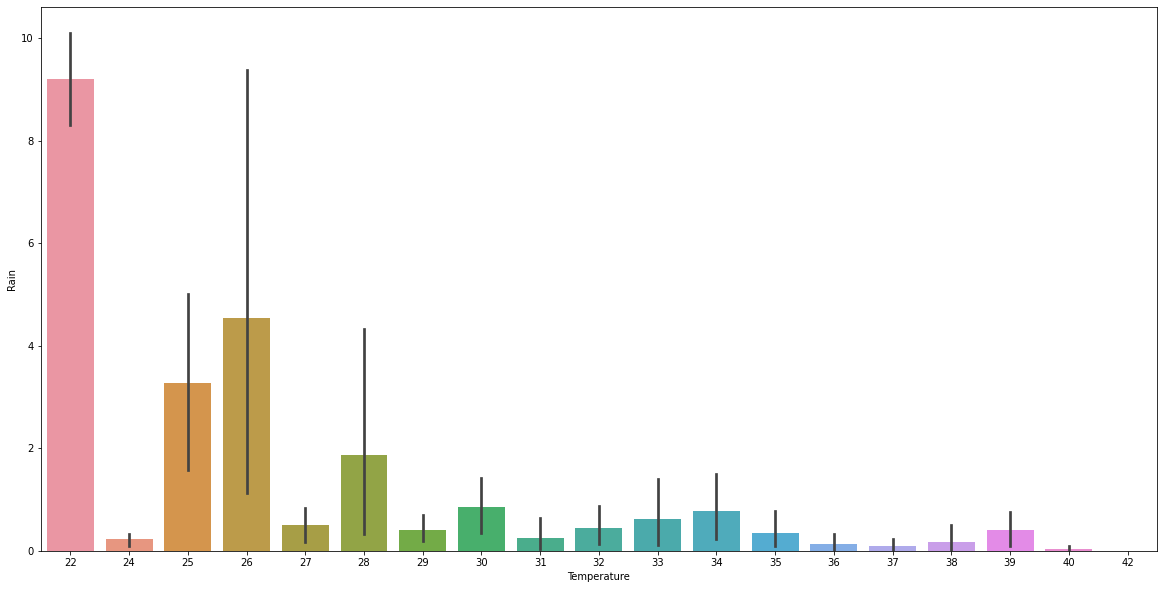

In [40]:
plt.rcParams['figure.figsize'] = (20,10)

sns.barplot(x = 'Temperature', y = 'Rain', data = df)

#### Observation:
- Where temperature is high there rain is low

----

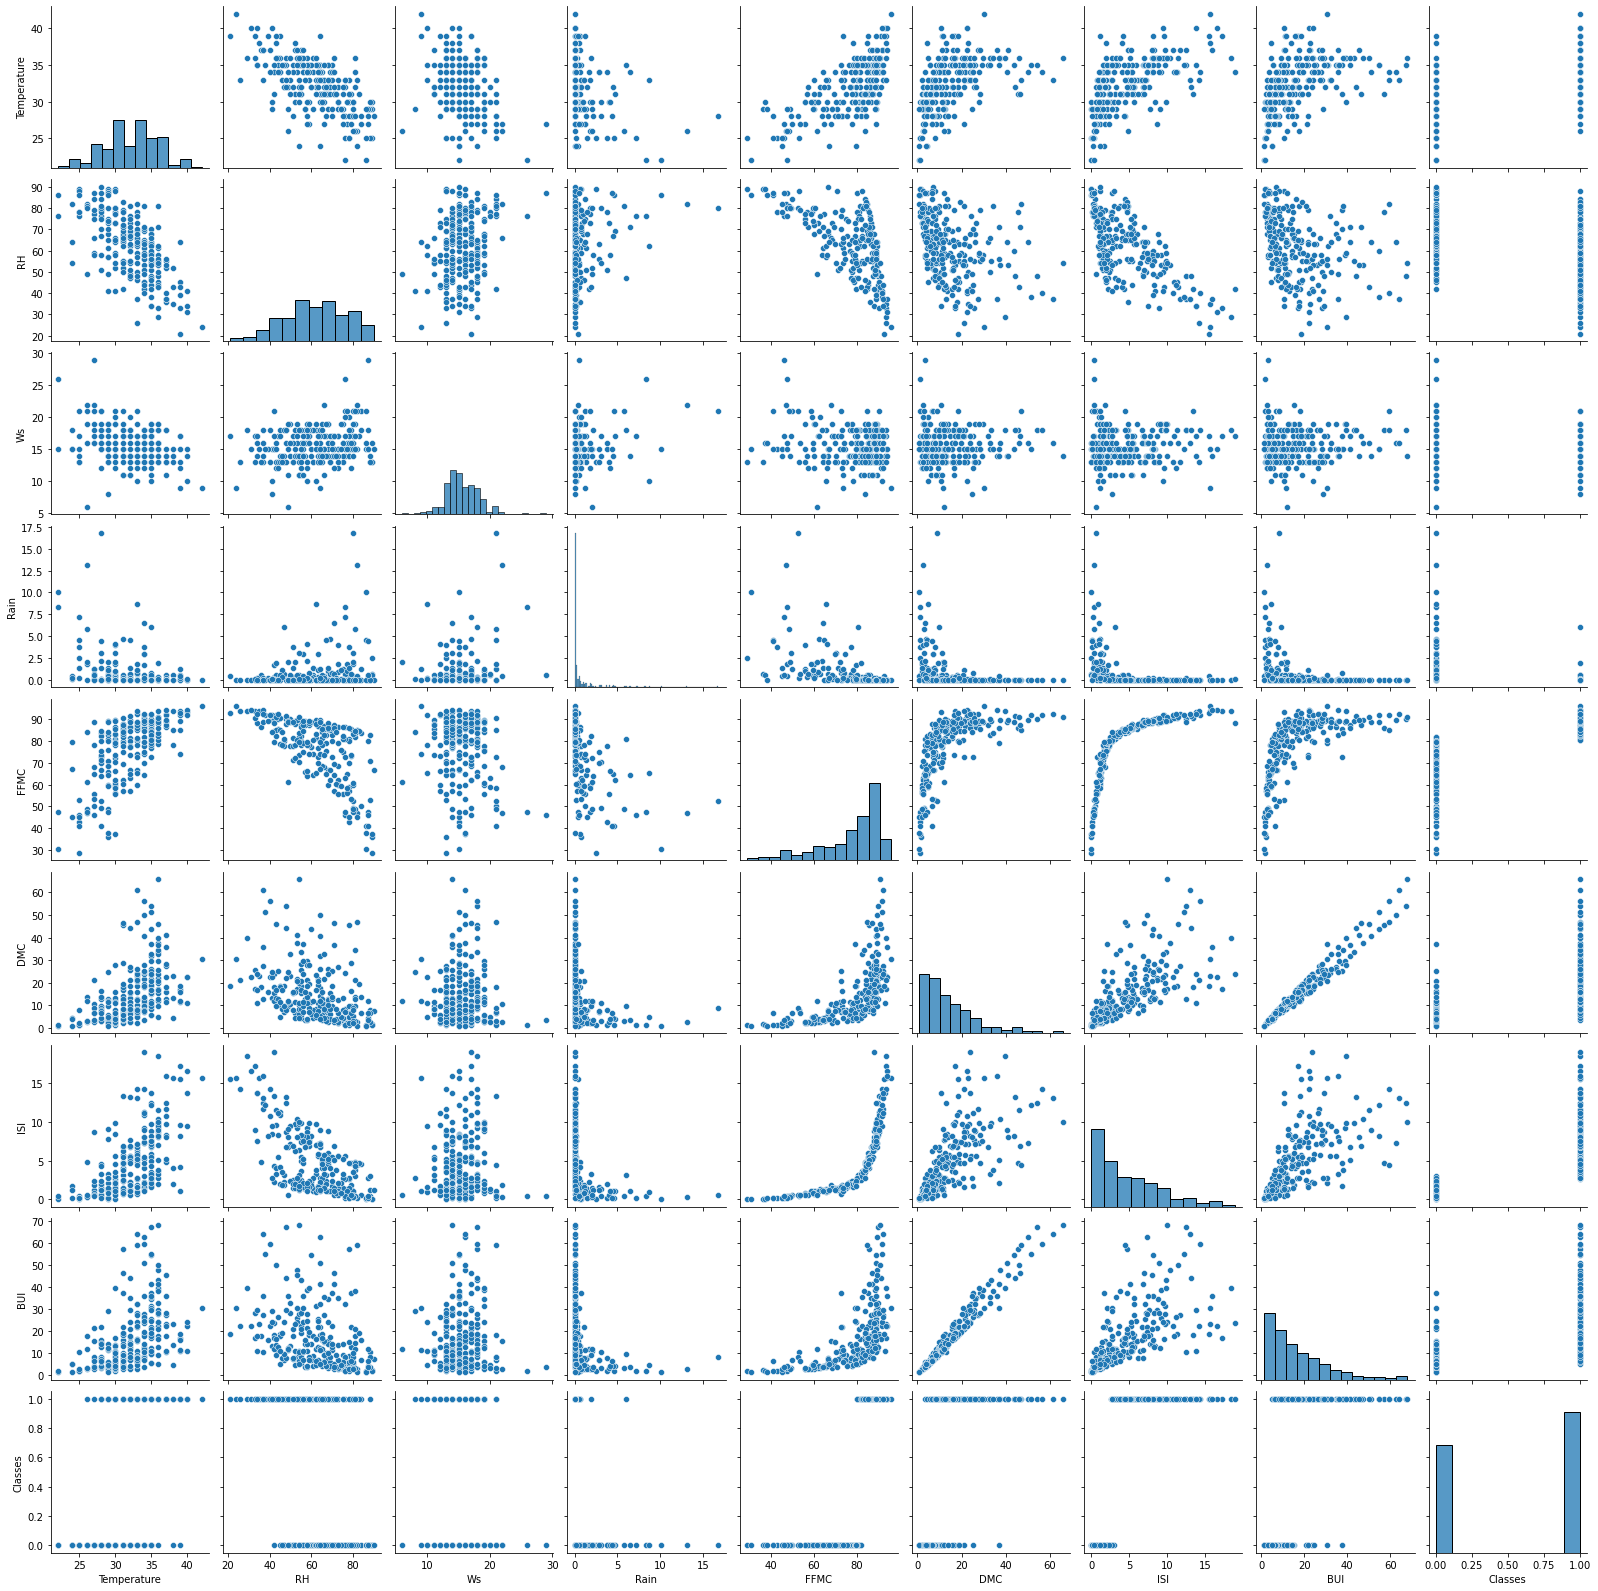

In [41]:
sns.pairplot(df)

-----

<AxesSubplot:>

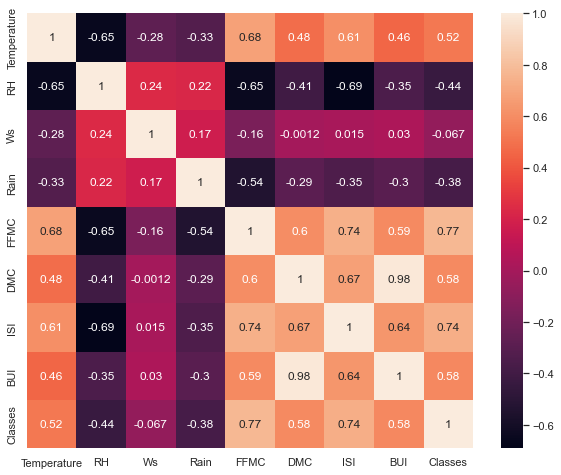

In [42]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df.corr(), annot= True)

---

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

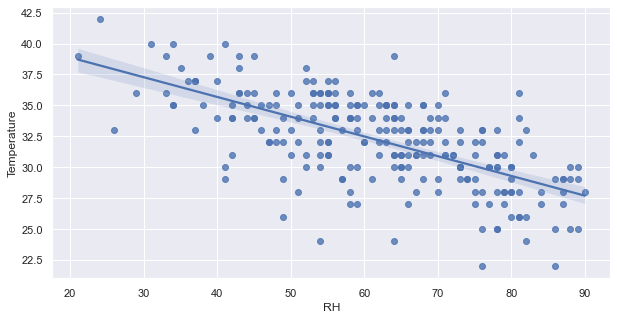

In [43]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.regplot(x = 'RH', y = 'Temperature', data = df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

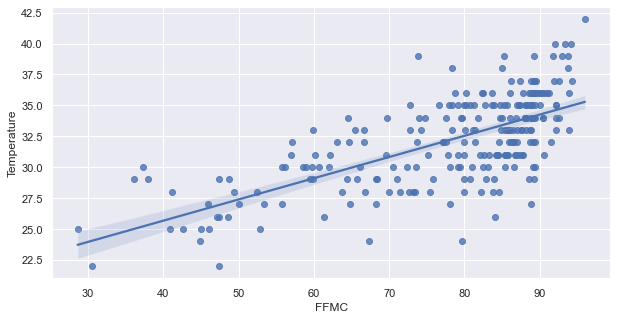

In [44]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.regplot(x = 'FFMC', y = 'Temperature', data = df)

<AxesSubplot:xlabel='Temperature'>

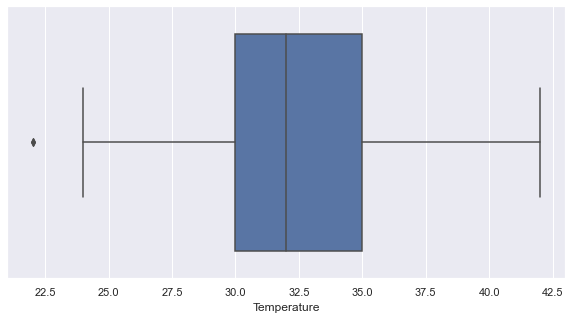

In [45]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Rain'>

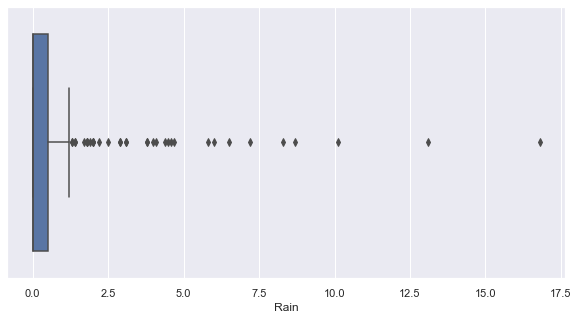

In [46]:
sns.boxplot(df['Rain'])

##### Converting object dtype to float dtype for model accuracy in X_train dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    object        
 12  Date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


In [48]:
df = df.drop(columns = ('DC'), axis = 1)
df = df.drop(columns = ('FWI'), axis = 1)

In [49]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes,Region,Date
0,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,Bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,Bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,Bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,Bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,Bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0,Sidi_Bel_Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0,Sidi_Bel_Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0,Sidi_Bel_Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0,Sidi_Bel_Abbes,2012-09-29


###### Independent and dependent feature:

In [50]:
# independent feature
x = df.iloc[:,1:-2]

In [51]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
0,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0
1,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0
2,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0
3,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0
...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,4.5,16.9,1.0
240,87,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87,29.0,0.5,45.9,3.5,0.4,3.4,0.0
242,54,18.0,0.1,79.7,4.3,1.7,5.1,0.0


In [52]:
# Targeted feature
y = df.iloc[:,0]

In [53]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.35, random_state =42)

In [56]:
X_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
31,75,19.0,1.2,55.7,2.4,0.8,2.8,0.0
12,84,21.0,1.2,50.0,6.7,0.5,6.7,0.0
35,63,14.0,0.0,87.0,10.9,5.6,12.5,1.0
28,47,13.0,0.3,79.9,18.4,2.2,23.8,0.0
42,81,15.0,0.0,81.8,9.7,3.0,11.7,0.0
...,...,...,...,...,...,...,...,...
106,82,15.0,0.4,44.9,0.9,0.2,1.4,0.0
14,80,17.0,3.1,49.4,3.0,0.4,3.0,0.0
92,76,17.0,7.2,46.0,1.3,0.2,1.8,0.0
179,57,16.0,0.0,87.5,15.7,6.7,15.7,1.0


In [57]:
Y_train

31     27
12     27
35     32
28     32
42     34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 158, dtype: int32

In [58]:
X_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
24,64,15.0,0.0,86.7,14.2,5.7,18.3,1.0
6,54,13.0,0.0,88.2,9.9,6.4,10.9,1.0
153,48,16.0,0.0,87.6,7.9,6.8,7.8,1.0
211,53,17.0,0.5,80.2,20.7,2.7,30.6,1.0
198,41,10.0,0.1,92.0,22.6,9.5,24.2,1.0
...,...,...,...,...,...,...,...,...
114,54,11.0,0.5,73.7,7.9,1.2,9.6,0.0
65,65,13.0,0.0,86.8,11.1,5.2,11.5,1.0
132,42,21.0,0.0,90.6,18.2,13.4,18.0,1.0
207,40,18.0,0.0,92.1,56.3,14.3,59.5,1.0


In [59]:
Y_test

24     31
6      33
153    33
211    35
198    40
       ..
114    32
65     34
132    31
207    34
162    34
Name: Temperature, Length: 86, dtype: int32

#### Standardize or Feature Scalling the Dataset

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
X_train

array([[ 0.79950541,  1.31721344,  0.13835345, ..., -0.89440145,
        -0.94830841, -1.03872391],
       [ 1.41106899,  2.07263893,  0.13835345, ..., -0.96799046,
        -0.67664516, -1.03872391],
       [-0.0159127 , -0.57135029, -0.39265492, ...,  0.28302271,
        -0.27263316,  0.96271972],
       ...,
       [ 0.86745692,  0.56178794,  2.79339527, ..., -1.04157947,
        -1.01796565, -1.03872391],
       [-0.42362175,  0.1840752 , -0.39265492, ...,  0.55284908,
        -0.04972998,  0.96271972],
       [ 0.93540843,  2.07263893,  0.40385763, ..., -0.82081244,
        -0.9761713 , -1.03872391]])

In [64]:
X_test

array([[ 0.05203881, -0.19363755, -0.39265492,  0.68626832, -0.01705759,
         0.30755238,  0.13137885,  0.96271972],
       [-0.62747627, -0.94906304, -0.39265492,  0.78794088, -0.36403151,
         0.47926007, -0.38408474,  0.96271972],
       [-1.03518533,  0.1840752 , -0.39265492,  0.74727186, -0.52541473,
         0.57737875, -0.60002219,  0.96271972],
       [-0.69542778,  0.56178794, -0.17140143,  0.24568723,  0.50743787,
        -0.42833772,  0.98816293,  0.96271972],
       [-1.51084589, -2.08220127, -0.34840422,  1.04551136,  0.66075193,
         1.23967985,  0.54235658,  0.96271972],
       [ 0.05203881, -2.45991402,  0.13835345, -0.18811568, -0.21878662,
        -0.82081244, -0.34925612, -1.03872391],
       [-1.6467489 , -0.19363755, -0.30415353,  0.86250076,  0.11204898,
         0.92079414, -0.04276426,  0.96271972],
       [ 1.13926295, -0.57135029,  0.49235902, -1.8894365 , -0.98535691,
        -1.0170498 , -0.96223985, -1.03872391],
       [ 1.07131144, -1.32677578

### Model Training

In [65]:
## Linear regression
from sklearn.linear_model import LinearRegression

In [66]:
regression = LinearRegression()

In [67]:
regression.fit(X_train, Y_train)

LinearRegression()

---

In [68]:
# print the coefficient

print(regression.coef_)

[-1.08060891 -0.39426341  0.05369353  1.75309002  0.35709084  0.26190909
  0.04128937 -0.28432285]


In [69]:
# Print the intercept

print(regression.intercept_)

31.949367088607595


In [70]:
# prediction for the Test data

reg_pred = regression.predict(X_test)

In [71]:
reg_pred

array([32.95764578, 34.06780105, 33.94947747, 32.73696208, 36.5264071 ,
       32.52843998, 35.30660031, 27.29498228, 30.83335087, 29.45892303,
       29.51912649, 33.33023178, 33.82151337, 33.33523602, 34.35421065,
       32.20925449, 37.32985204, 25.22009501, 32.18470498, 33.463987  ,
       30.91100632, 28.35842913, 34.89934282, 28.7995497 , 36.84001142,
       26.85923844, 32.60632304, 33.23542466, 32.88124258, 34.84817513,
       34.39447788, 31.42632623, 32.7002414 , 33.36576757, 32.71052131,
       33.35911937, 30.33065463, 34.19008739, 31.48074733, 24.22503198,
       33.33500408, 33.57345716, 32.58445434, 24.89454281, 36.20823264,
       32.43926266, 31.3040291 , 30.51256547, 35.39761283, 34.57523645,
       37.40886611, 30.76445649, 31.09141477, 34.43156973, 33.842683  ,
       32.32805441, 37.55166008, 32.40461379, 30.19055898, 36.57231304,
       33.22433686, 30.12896482, 34.11062868, 31.90353301, 31.91954767,
       24.90581867, 33.20336601, 30.59383164, 37.10033689, 35.13

### Assumption of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

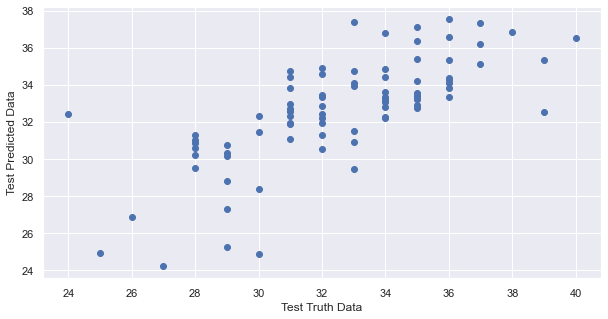

In [72]:
# Relationship Between Real Data & Predicted Data

plt.scatter(Y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data") 

In [73]:
# Calculating Residual

residuals = Y_test - reg_pred

In [74]:
residuals

24    -1.957646
6     -1.067801
153   -0.949477
211    2.263038
198    3.473593
         ...   
114   -0.828132
65     0.947068
132   -3.752085
207   -2.798941
162    1.732072
Name: Temperature, Length: 86, dtype: float64

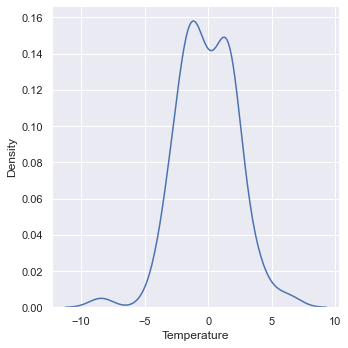

In [75]:
sns.displot(residuals, kind ="kde")

#### Observation:
- Distribution is left skewed

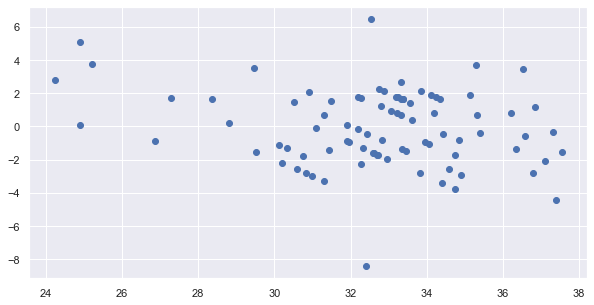

In [76]:
# Scatter Plot with predictions and residual

plt.scatter(reg_pred, residuals)

### Performance Matrics

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

5.203554571527474
1.8408804148198064
2.2811301084172015


In [78]:
# R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.49085185993785796


In [79]:
# Adjusted R square

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4379533518794536

## Ridge Regression Model Prediction:


In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge = Ridge()

In [82]:
ridge.fit(X_train,Y_train)

Ridge()

In [83]:
# print the coefficients

print(ridge.coef_)

[-1.08659106 -0.39378546  0.04104674  1.70835055  0.32306296  0.2669647
  0.07844385 -0.26134209]


In [84]:
# print the intercept

print(ridge.intercept_)

31.949367088607595


In [85]:
# Prediction for the Test data

ridge_pred = ridge.predict(X_test)

In [86]:
ridge_pred

array([32.96064512, 34.06347861, 33.94791963, 32.77197268, 36.51813895,
       32.50006746, 35.30299514, 27.33496519, 30.81735195, 29.46930028,
       29.50278293, 33.30899609, 33.7833448 , 33.30271256, 34.37053162,
       32.20109694, 37.3193395 , 25.30168945, 32.17602582, 33.46117286,
       30.87272485, 28.37798558, 34.89485864, 28.8178901 , 36.83341195,
       26.90375714, 32.61149629, 33.24077638, 32.86183117, 34.8435399 ,
       34.39271977, 31.40966319, 32.7033751 , 33.37964282, 32.68044692,
       33.3317312 , 30.30858328, 34.19852458, 31.43769638, 24.28038782,
       33.35591333, 33.57774567, 32.56332038, 24.97369405, 36.199294  ,
       32.43435214, 31.29339045, 30.50481522, 35.39976449, 34.57234588,
       37.40446914, 30.77295201, 31.08053445, 34.44396718, 33.85515767,
       32.34159398, 37.5485927 , 32.37495288, 30.1937819 , 36.57302978,
       33.2200043 , 30.12505426, 34.10136438, 31.90071459, 31.8989055 ,
       24.95388228, 33.20544158, 30.59251825, 37.09844617, 35.13

Text(0, 0.5, 'Test Predicted Data')

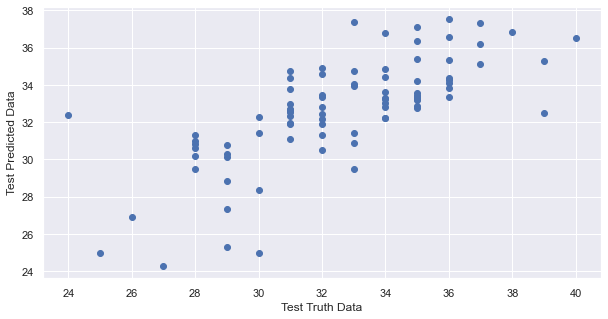

In [87]:
# Relationship Between Real Data & Predicted Data.

plt.scatter(Y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [88]:
#  Calculating residuals:

residuals=Y_test- ridge_pred

In [89]:
residuals

24    -1.960645
6     -1.063479
153   -0.947920
211    2.228027
198    3.481861
         ...   
114   -0.814306
65     0.954847
132   -3.751073
207   -2.797559
162    1.767310
Name: Temperature, Length: 86, dtype: float64

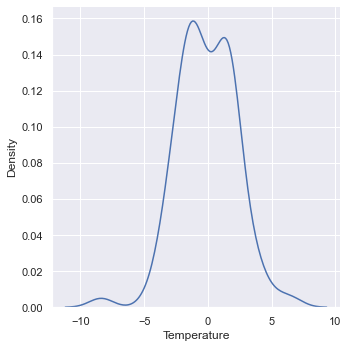

In [90]:
sns.displot(residuals,kind="kde")

#### Observation:
Distribution is left skewed

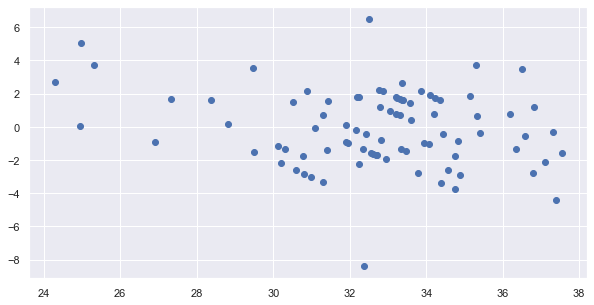

In [91]:
# Scatter plot with predictions and residual

plt.scatter(ridge_pred,residuals)

In [92]:
# Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE:",mean_squared_error(Y_test,ridge_pred))
print("MAE:",mean_absolute_error(Y_test,ridge_pred))
print("-", np.sqrt(mean_squared_error(Y_test,ridge_pred)))

MSE: 5.174155731727667
MAE: 1.8364322570975322
- 2.2746770609753963


In [93]:
# R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.4937284252545666


In [94]:
# Adjusted R square

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.44112878112517095

## Lasso Regression Model Prediction

In [95]:
from sklearn.linear_model import Lasso

In [96]:
lasso = Lasso()

In [97]:
lasso.fit(X_train,Y_train)

Lasso()

In [98]:
# print the coefficients

print(lasso.coef_)

[-0.67814672 -0.         -0.          1.26986719  0.          0.
  0.          0.        ]


In [99]:
# print the Intercept

print(lasso.intercept_)

31.949367088607595


In [100]:
# Prediction for the Test data

lasso_pred = lasso.predict(X_test)

In [101]:
lasso_pred

array([32.78554676, 33.37546834, 33.60031064, 32.73295932, 34.30160285,
       31.6751952 , 34.16136587, 28.77744624, 30.93233455, 30.06404005,
       31.01893357, 32.44230222, 32.841811  , 32.3390137 , 33.40685363,
       32.44880857, 34.68389688, 27.27818697, 32.25283261, 33.15723972,
       31.57232462, 29.73286502, 33.70916232, 30.29444551, 34.73302218,
       28.66555034, 32.55010339, 32.85744998, 33.06109013, 33.98816783,
       33.29495774, 31.28891378, 32.79415414, 32.82858364, 32.614975  ,
       32.77704671, 31.3865318 , 33.37399989, 31.05294515, 28.21387205,
       32.83015941, 32.9881364 , 32.66462556, 27.38147549, 34.33907657,
       32.53792654, 31.82141328, 30.87113973, 34.30569757, 33.5567485 ,
       34.50314197, 31.77081953, 31.72064372, 32.97490904, 33.50762319,
       32.06294507, 35.01811612, 32.64384134, 31.08233674, 34.54974832,
       33.17392921, 31.15570841, 33.34355779, 32.20171361, 32.143563  ,
       27.82958432, 33.07620386, 31.61431099, 34.4484535 , 34.21

Text(0, 0.5, 'Test Predicted Data')

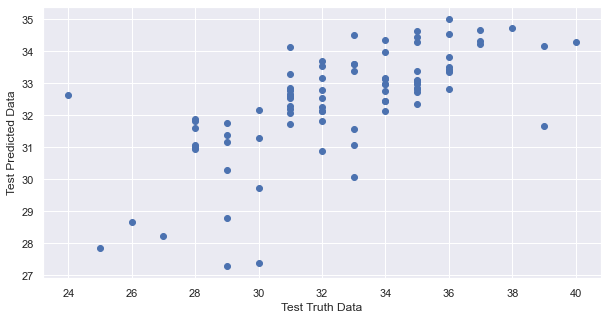

In [102]:
# Relationship Between Real Data & Predicted Data.

plt.scatter(Y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [103]:
# Calculating residuals

residuals=Y_test- lasso_pred

In [104]:
residuals

24    -1.785547
6     -0.375468
153   -0.600311
211    2.267041
198    5.698397
         ...   
114   -0.127399
65     1.251927
132   -3.135018
207   -0.356291
162    1.870082
Name: Temperature, Length: 86, dtype: float64

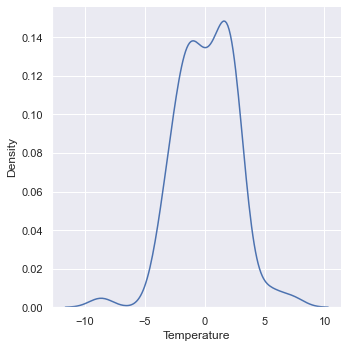

In [105]:
sns.displot(residuals,kind="kde")

#### Observation

- Here, Distribution is Left Skewed Distribution

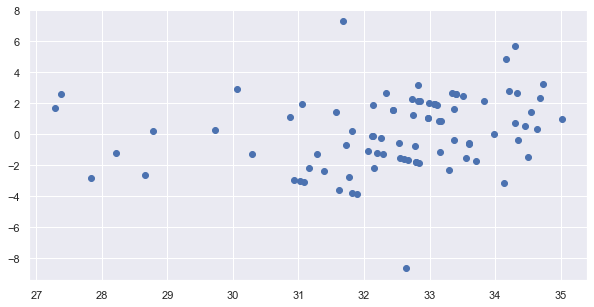

In [106]:
# Scatter plot with predictions and residual


plt.scatter(lasso_pred,residuals)

In [107]:
# Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

5.8127964745938385
1.9427857421355683
2.4109741754307197


In [108]:
# R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

0.43123984328073206


In [109]:
# Adjusted R square

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.37214787894626267

## Elastic Net Regression Model Prediction

In [110]:
from sklearn.linear_model import ElasticNet

In [111]:
elastic = ElasticNet()

In [112]:
elastic.fit(X_train, Y_train)

ElasticNet()

In [113]:
# print the coefficients

print(elastic.coef_)

[-0.72318319 -0.06776059 -0.02082665  0.8439272   0.15943101  0.33348399
  0.06190487  0.08848973]


In [114]:
# print the Intercepts

print(elastic.intercept_)

31.949367088607595


In [115]:
# Prediction for the Test data

elastic_pred = elastic.predict(X_test)

In [116]:
elastic_pred

array([32.70536076, 33.30380062, 33.48116908, 32.70955401, 34.71019123,
       31.4946351 , 34.29508923, 28.91163526, 30.6507022 , 29.98248011,
       30.43367283, 32.25029265, 32.43375465, 32.05682255, 33.90693873,
       32.27817713, 35.69013806, 27.75348395, 32.09922002, 32.96790969,
       30.98830553, 29.58544356, 33.70249841, 30.09384439, 35.48767183,
       28.79865687, 32.38425254, 32.87607823, 32.76352064, 34.2973461 ,
       33.32186159, 31.10593364, 32.77664454, 33.09921046, 32.11241752,
       32.39657511, 30.8244118 , 33.33594889, 30.88553581, 28.06574509,
       32.82044486, 32.80050955, 32.25967527, 27.7359607 , 34.77204264,
       32.41823955, 31.71681888, 30.68768836, 34.42221937, 33.62895605,
       35.72953189, 31.36862821, 31.58361515, 33.60566732, 33.69975344,
       32.37857748, 36.22564139, 32.03005288, 30.83607435, 34.96397069,
       33.1601067 , 30.80927906, 33.55046858, 31.92381832, 31.75439759,
       27.93609672, 33.04407863, 31.36277646, 35.45875423, 34.58

Text(0, 0.5, 'Test Predicted Data')

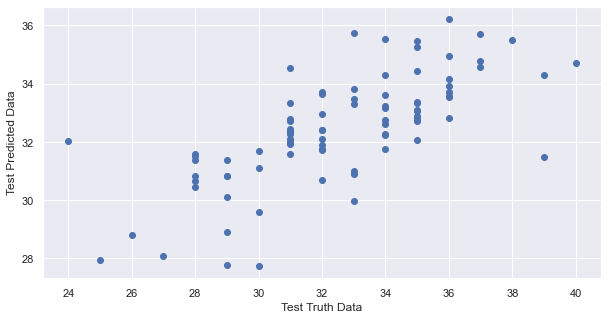

In [117]:
# Relation Between Real Data and Predicted Data

plt.scatter(Y_test,elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [118]:
residuals=Y_test- elastic_pred

In [119]:
residuals

24    -1.705361
6     -0.303801
153   -0.481169
211    2.290446
198    5.289809
         ...   
114    0.112876
65     1.396977
132   -3.536043
207   -1.539634
162    2.262375
Name: Temperature, Length: 86, dtype: float64

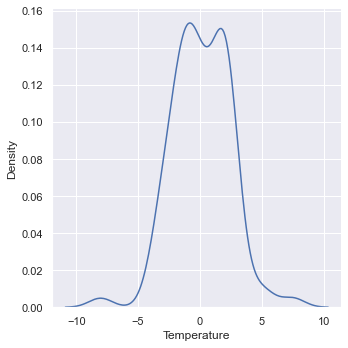

In [120]:
sns.displot(residuals,kind="kde")

#### Observation

Here, Distribution is  Left Skewed.

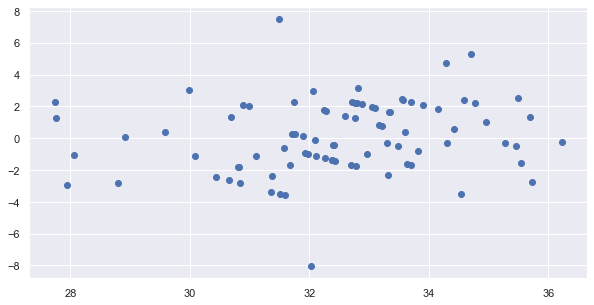

In [121]:
# SCatter plot with predictions and residual

plt.scatter(elastic_pred,residuals)

### Performance Metrics

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))

5.295105863660768
1.8392561559775067
2.301109702656692


#### R Squared and Adjusted R Squared

In [123]:
## R Squared

from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
print(score)

0.48189391216019695


In [124]:
## Adjusted R square
#display adjusted R-squared

1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.42806470822878884

### ThankYou

---